# First-Order Differential Equations

We will study some of the more important analytical methods for solving first-order DEs. Before we start solving anything, you should be aware of two facts:

1. It is possible for a differential equation to have no solutions

2. A differential equation can possess solutions, yet there might not exist any analytical method for solving it.

## SOLUTION CURVES WITHOUT A SOLUTION

Let us imagine for the moment that we have in front of us a first-order differential equation $dy/dx = f (x, y)$, and let us further imagine that we can neither find nor invent a method for solving it analytically. This is not as bad a predicament as one might think, since the differential equation itself can sometimes "tell" us specifics about how its solutions "behave".

We begin our study of first-order differential equations with two ways of analyzing a DE qualitatively. Both these ways enable us to determine, in an approximate sense, what a solution curve must look like without actually solving the equation.

### DIRECTION FIELDS

We begin, with a simple concept from calculus:

> A derivative $dy/dx$ of a differentiable function $y = y(x)$ gives slopes of tangent lines at points on its graph.

L"Function $\sin(x)$ and the slope of tangents given by 
 $\partial_x(\sin(x))=\cos(x)$"

┌ Info: Saved animation to 
│   fn = /home/mitch/pCloudDrive/Projects/Clario/Diffetential Equations/anim_fps30.gif
└ @ Plots /home/mitch/.julia/packages/Plots/ZyF4v/src/animation.jl:102


Plots.AnimatedGif("/home/mitch/pCloudDrive/Projects/Clario/Diffetential Equations/anim_fps30.gif")
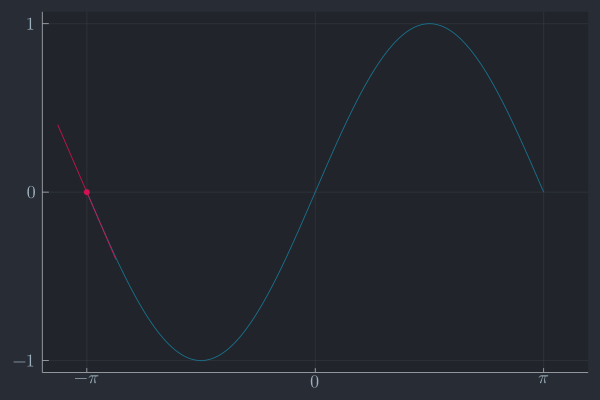

In [2]:
using Plots
using LaTeXStrings
using Latexify

gr()
theme(:juno)
# theme(:gruvbox_dark)
# theme(:wong)

f(x) = sin(x)
df(x) = cos(x)

x = -π:0.001:π

slopes = df.(x)
intercepts = f.(x) - slopes.*x
ε = 0.4

display(latexstring("Function \$\\sin(x)\$ and the slope of tangents given by \n \$\\partial_x(\\sin(x))=\\cos(x)\$"))
anim = @animate for i ∈ 1:75:length(x)
        plot(x, f.(x), color="#159abf", alpha=0.7)
        scatter!([x[i]], [f.(x[i])], color="#d11151", markerstrokewidth = 0, legend=false)
        plot!([x[i]-ε, x[i]+ε], [slopes[i]*(x[i]-ε)+intercepts[i], slopes[i]*(x[i]+ε)+intercepts[i]], color="#d11151")
        plot!(legend=false, xticks = ([-π,0,π],[L"-\pi",L"0",L"\pi"]), yticks = ([-1,0,1],[L"-1",L"0",L"1"]),
            xlims = [-π-ε, π+ε], ylims = [-1.01, 1.01])
        plot!(xtickfontsize=12,ytickfontsize=12)
    end

gif(anim, "anim_fps30.gif", fps = 100)

Because a solution $y = y(x)$ of a first-order differential equation:

$$\frac{dy}{dx} = f(x,y)$$

is necessarily a differentiable function on it's interval $I$ of definition, it must also be continuous on $I$. Thus the corresponding solution curve on I must have no breaks and must possess a tangent line at each point $(x, y(x))$. The function $f$ in the normal form is called the __slope function__ or __rate function__. The slope of the tangent line at $(x, y(x))$ on a solution curve is the value of the first derivative $dy/dx$ at this point, and we know from that this is the value of the slope function $f (x, y(x))$.

Now suppose that $(x, y)$ represents any point in a region of the $xy$-plane over which the function $f$ is defined. The
value $f (x, y)$ that the function $f$ assigns to the point represents the slope of a line or, as we shall envision it, a line segment called a __lineal element__.

For example, consider the equation $dy/dx = 0.2xy$, where $f (x, y) = 0.2xy$. At, say, the point $(2, 3)$ the slope of a lineal element is 

$$f (2, 3) = 0.2(2)(3) = 1.2$$

if a solution curve also passes through the point (2, 3), it does so tangent to this line segment; in other words, the lineal element is a miniature tangent line at that point.

In [ ]:
# This is the solution of the IVP
y_(x) = 2.01096*exp(0.1*x^2)

x = 0:0.01:4
n = 3-1.2*2

p1 = plot(([0, 4], [n, 1.2*4+n]))
scatter!([2], [3], markerstrokewidth = 0, series_annotations=(text.([(2,3)], :top, :white, :10, :hleft)) )
title!("Linear Elememt at (3,2)")
p2 = plot(x, y_.(x))
scatter!([2], [3], markerstrokewidth = 0,series_annotations=(text.([(2,3)], :top, :white, :10, :hleft)) )
plot!([0, 4], [n, 1.2*4+n])
title!("Linear Elememt \nand Solution Curve at (3,2)")
p3 = plot(p1,p2)
plot!(xlimit=[-2,4], ylimit=[-5,10], xticks=[0,2], yticks=[0,3], legend=false, size=(800,400))

**Direction Field**

> If we systematically evaluate $f$ over a rectangular grid of points in the $xy$-plane and draw a line element at each point $(x, y)$ of the grid with slope $f (x, y)$, then the collection of all these line elements is called a **direction field** or a **slope field** of the differential equation $dy/dx = f (x, y)$. 

Visually, the direction field suggests the appearance or shape of a family of solution curves of the differential equation, and consequently, it may be possible to see at a glance certain qualitative aspects of the solutions -regions in the plane, for example, in which a solution exhibits an unusual behavior. 

A single solution curve that passes through a direction field must follow the flow pattern of the field; it is tangent to a lineal element when it intersects a point in the grid. 

The following figure shows a computer-generated direction field of the differential equation $dy/dx = sin(x + y)$ over a region of the $xy$-plane. Note how the three solution curves shown in color follow the flow of the field.

In [ ]:
function direction_field(fun::Function, xlim::Tuple, ylim::Tuple, step::Float64=0.5)
    
    xs = xlim[1]:step:xlim[2]
  
    ys = ylim[1]:step:ylim[2]
    xxs = [x for x in xs for y in ys]
    yys = [y for x in xs for y in ys]
    ε = step/6
    tangent(x, m, n) = m*x + n
    m = fun(xxs[1], yys[1])
    n = yys[1] - m*xxs[1]
    l = step/2
    x1(x0, m) = (l + sqrt(1+m^2)*x0)/(sqrt(1+m^2))
    p = plot([xxs[1], x1(xxs[1], m)], [tangent(xxs[1],m,n), tangent(x1(xxs[1], m),m,n)], color="white", alpha=0.4, lab=nothing)

    for i ∈ 2: length(xxs)
        m = f(xxs[i], yys[i])
        n = yys[i] - m*xxs[i]
        p = plot!([xxs[i], x1(xxs[i], m)], [tangent(xxs[i],m,n), tangent(x1(xxs[i], m),m,n)], color="white", alpha=0.4, lab=nothing)

    end
    return p
end

f(x,y) = 0.2*x*y

p1 = direction_field(f, (-6,6), (-6,6), 0.5)
title!("Direction Field")
p3 = direction_field(f, (-6,6), (-6,6),)
# title!("Direction Field \nand Solution Curves")
# Solutions of the ODE
y_(x,c) = c*exp(0.1*x^2)

p2 = plot()
title!("Solution Curves")

for c in -1.2:0.4:1.2

    if c != 0
        color = (c < 0) ? "#159abf" : "#d11151"
    else
        color = "#20e86d"
    end
    
    plot!(p2, -6:0.01:6, y_.(-6:0.01:6, c), color=color, lw=2)
    plot!(p3, -6:0.01:6, y_.(-6:0.01:6, c), color=color, lw=2)
    
end

display(latexstring("ODE: y'(x) = 0.2xy"))
display(latexstring("Solution: y(x) = ce^{0.1x}"))
p = plot(p1,p2,p3, legend=false, xlims=[-6,6], ylims=[-6,6], xticks=[0], yticks=[0], size=(1200,400), layout=(1,3))

**Increasing/Decreasing**

Interpretation of the derivative $dy/dx$ as a function that gives slope plays the key role in the construction of a direction field. Another telling property of the first derivative will be used next, namely, if $dy/dx>0$ ($dy/dx<0$) for all $x$ in an interval $I$, then a differentiable function $y = y(x)$ is increasing (decreasing) on $I$.

### AUTONOMOUS FIRST-ORDER DEs

> An ordinary differential equation in which the independent variable does not appear explicitly is said to be __autonomous__. If the symbol $x$ denotes the independent variable, then an autonomous first-order differential equation can be written as $f (y, y' ) = 0$ or in normal form as $$\frac{dy}{dx}=f(y)$$

**Critical Points**

Consider an autonomous equation:

$$\frac{dy}{dx}=f(y)$$

The zeros of the function $f$ in are of special importance. We say that a real number $c$ is a critical point of the autonomous differential equation if it is a zero of $f$ -that is, $f (c) = 0$. 

A critical point is also called an __equilibrium point__ or __stationary point__. Now observe that if we substitute the constant function $y(x) = c$, then both sides of the equation are zero. This means:

> If c is a critical point of, then $y(x) = c$ is a constant solution of the autonomous differential equation.

A constant solution $y(x) = c$ is called an __equilibrium solution__; equilibria are the only constant solutions.

As was already mentioned, we can tell when a non-constant solution $y = y(x)$ is increasing or decreasing by determining the algebraic sign of the derivative $dy/dx$; in the case of an autonomous DE we do this by identifying intervals on the $y$-axis over which the function $f(y)$ is positive or negative.

**EXAMPLE 3** _An Autonomous DE:_

The differential equation:

$$\frac{dP}{dt} = P(a-bP)$$

Have two critical points $0$ and $a/b$, meaning that the equilibrium solutions are $P(t) = 0$ and $P(t) = a/b$

The three intervals determined on the $P$-axis or phase line by the critical points $0$ and $a/b$ correspond in the $tP$-plane to three subregions defined by:

$$R_1:-\infty<P<0 \qquad R_2:0<P<a/b \qquad R_3:a/b<P<\infty$$

where $-\infty<t<\infty$.

In [ ]:
# Make a=1, b=2

f(t,P) = P*(1-2*P)

p1 = direction_field(f, (-2,2), (-2,2), 0.15)
title!("Direction Field")
p3 = direction_field(f, (-2,2), (-2,2), 0.15)
# title!("Direction Field \nand Solution Curves")

# Solutions of the ODE
P(t,c) = exp(t)/(c+2*exp(t))

p2 = plot()
title!("Solution Curves")

t = -2:0.01:2
for c in -1.5:.5:1.5

    if c != 0
        color = (c < 0) ? "#159abf" : "#d11151"
    else
        continue
    end
    
    if c<0
        plot!(p2, t[t.<log(-c/2)], P.(t[t.<log(-c/2)], c), color=color, lw=2, lab=nothing)
        plot!(p2, t[t.>log(-c/2)], P.(t[t.>log(-c/2)], c), color=color, lw=2, lab=nothing)
    else
        plot!(p2, t, P.(t, c), color=color, lw=2, lab=nothing)
    end
    
end

hline!([0, 1/2], color=:grey, alpha=0.5, linestyle=:dash)

plot!(p3, t[t.<log(1.5/2)], P.(t[t.<log(1.5/2)], -1.5), color=:green, lw=2, lab=nothing)
plot!(p3, t[t.>log(1.5/2)], P.(t[t.>log(1.5/2)], -1.5), color=:green, lw=2, lab=nothing)
plot!(p3, t, P.(t, 1.5), color=:orange, lw=2, lab=nothing)

plot!(-4:4, [repeat([0],9), repeat([0],9)], fillrange=[repeat([0],9).-6 repeat([0],9).+0], fillalpha=0.3, c=:green, lw=0, lab=["a", "b"])
#     lab=L"R_1:-\infty<P<0 ")
plot!(-4:4, [repeat([0],9), repeat([0],9)], fillrange=[repeat([0],9).-0 repeat([0],9).+1/2], fillalpha=0.3, c=:orange, lw=0)
#     lab=L"R_2:0<P<a/b")
plot!(-4:4, [repeat([1/2],9), repeat([1/2],9)], fillrange=[repeat([1/2],9) repeat([1/2],9).+6], fillalpha=0.3, c=:green, lw=0)
#     lab=L"R_3:a/b<P<\infty")

annotate!([(1.7, 1.7, text(L"R_3", 13, :white))])
annotate!([(1.7, 0.2, text(L"R_2", 13, :white))])
annotate!([(1.7, -1, text(L"R_1", 13, :white))])

p = plot(p1,p2,p3, legend=false, xlims=[-2,2], ylims=[-2,2], xticks=[0], yticks=[0], size=(1200,400), layout=(1,3))

The phase portrait in the previous figure tells us that $P(t)$ is decreasing in $R_1$, increasing in $R_2$ , and decreasing in $R_3$. 

Now consider an IVP where $P(0) = P_0$ is the initial value, then in $R_1, R_2, \text{ and } R_3$ we have, respectively, the following:

1. For $P_0<0$, $P(t)$ is bounded above. Since $P(t)$ is decreasing, $P(t)$ decreases without bound for increasing $t$, and so $P(t) \rightarrow 0$ as $t \rightarrow \infty$. This means the equilibrium solution $P(t) = 0$, is a horizontal asymptote for a solution curve.

2. For $0<P_0<1/b$, $P(t)$ is bounded. Since $P(t)$ is increasing, $P(t) \rightarrow a/b$ as $t \rightarrow \infty$ and $P(t) \rightarrow 0$ as $t \rightarrow -\infty$. The graphs of the two equilibrium solutions, $P(t)=0$ and $P(t) = a/b$, are horizontal lines that are horizontal asymptotes for any solution curve starting in this subregion.

3. For $P_0 > a/b$, $P(t)$ is bounded below. Since $P(t)$ is decreasing, $P(t) \rightarrow a/b$ as $t \rightarrow \infty$. The graph of the equilibrium solution $P(t) = a/b$ is a horizontal asymptote for a solution curve.

**Attractors and Repellers**

Suppose that $y(x)$ is a nonconstant solution of the autonomous differential equation given

$$\frac{dy}{dx}=f(y)$$

and that $c$ is a critical point of the DE. There are basically three types of behavior that $y(x)$ can exhibit near $c$.

In [ ]:
vline([0, 1, 2, 3], yticks=[], color="#ff5900", lw=2)
p = scatter!([0, 1, 2, 3], [0, 0, 0, 0], markerstrokewidth = 0, color="#ff5900", markersize=5)
annotate!([(0.25, 0, text(L"c", 13, :white))])
annotate!([(1.25, 0, text(L"c", 13, :white))])
annotate!([(2.25, 0, text(L"c", 13, :white))])
annotate!([(3.25, 0, text(L"c", 13, :white))])
#     series_annotations=(text.(["c"], :left, :white, :12)) )
scatter!([0, 1, 2, 3], [-0.3, 0.3, 0.3, -0.3], markerstrokewidth = 0, color="#20e86d", markersize=4)
annotate!([(0.25, -0.3, text(L"y_0", 13, :white))])
annotate!([(1.25,  0.3, text(L"y_0", 13, :white))])
annotate!([(2.25,  0.3, text(L"y_0", 13, :white))])
annotate!([(3.25, -0.3, text(L"y_0", 13, :white))])
scatter!([0, 1, 2, 2], [-.75, .75, .75, -.75], markershape=:utriangle, markersize=5, markerstrokewidth = 0, color=:white)
scatter!([0, 1, 3, 3], [.75, -.75, .75, -.75], markershape=:dtriangle, markersize=5, markerstrokewidth = 0, color=:white)
xticks!([0, 1, 2, 3], [L"(a)", L"(b)", L"(c)", L"(d)"] )
xlims!(-0.5, 3.5)
plot!(legend=false, size=(300,400))

* When both arrowheads on either side of the dot labeled $c$ point _toward_ $c$, as in $(a)$, all solutions $y(x)$ that start from an initial point $(x_0 , y_0 )$ sufficiently near $c$ exhibit the asymptotic behavior $\lim _{x\rightarrow\infty} y(x) = c$ . For this reason the critical point $c$ is said to be __asymptotically stable__.

* When both arrowheads on either side of the dot labeled $c$ point away from $c$, as in $(b)$, all solutions $y(x)$ that start from an initial point $(x_0 , y_0 )$  move away from $c$ as $x$ increases. In this case the critical point $c$ is said to be __unstable__. An unstable critical point is also called a __repeller__, for obvious reasons. 

* The critical point $c$ illustrated in $(c)$ and $(d)$ is neither an attractor nor a repeller. But since $c$ exhibits characteristics of both an
attractor and a repeller -that is, a solution starting from an initial point $(x_0 , y_0 )$  sufficiently near $c$ is attracted to $c$ from one side and repelled from the other side- we say that the critical point $c$ is __semi-stable__. 

In **EXAMPLE 3** the critical point $a/b$ is asymptotically stable (an attractor) and the critical point $0$ is unstable (a repeller).

In [ ]:
y_(x, c) = 1-1/(x+c)
x = -3/4:0.01:1/4
p1 = plot(x, y_.(x, 1/2), xticks=[0], yticks=[0], lw=2)
vline!([-1/2], alpha=0.6, linestyle=:dash, color=:grey)
hline!([1], alpha=0.6, linestyle=:dash, color=:grey)

p2 = vline([0], yticks=[], color="#ff5900", lw=2, xlim=(-0.1, 0.1), size=(100,100), xticks=[])
scatter!([0], [0], markerstrokewidth = 0, color="#ff5900", markersize=5)
scatter!([0, 0], [0.75, -0.75], markershape=:utriangle, markersize=5, markerstrokewidth = 0, color=:white)
annotate!([(0.02, 0, text(L"1", 13, :white))])
annotate!([(0.04, 0.75, text(L"increasing", 12, :white))])
annotate!([(0.04, -0.75, text(L"increasing", 12, :white))])

p = plot(p2, p1, legend=false)

**Translation Property**

> If y(x) is a solution of an autonomous differential equation $dy/dx = f(y)$, then $y_1(x) = y(x - k)$, $k$ a constant, is also a solution.

## Separable Equations

**DEFINITION 1** _Separable Equation_

> A first-order differential equation of the form  $$\frac{dy}{dx} = g(x)h(y)$$  is said to be separable or to have separable variables.

### Method of Solution

The method of solution of separable equations is straightforward:

$$\frac{dy}{dx} = g(x)h(y) \quad \implies \quad = h(y)dy = g(x)dx  \quad \implies \quad \int \frac{dy}{h(y)} = \int g(x)dx $$


## Use of Computers

Consider the following IVP:

$$ (e^{2y} - y)\cos(x)\frac{dy}{dx} = e^y \sin(2x) \quad y(0)=0$$

**SOLUTION** Dividing the equation by $e^y \cos(x) gives

$$ \frac{(e^{2y} - y)}{e^y} dy  = \frac{\sin(2x)}{cos(x)}dx =  (e^{y} - y e^{-y}) dy  = sin(x)dx$$

$$\implies \int(e^{y} - y e^{-y}) dy  = \int sin(x)dx$$

$$\implies e^{y} + y e^{-y} + e{-y} = -2 cos(x) + c$$

The initial condition $y = 0$ when $x = 0$ implies $c = 4$. Thus a solution of the initial value problem is:

$$e^{y} + y e^{-y} + e{-y} = 4 -2 cos(x)$$

It may be difficult to use an implicit solution $G(x, y) = 0$ to find an explicit solution $y = \phi (x)$; sometimes it
simply cannot be done! 

One way of proceeding is to use computer generated contour plots to visualize the shape of the solution. For a function of two variables $z = G(x, y)$ the two-dimensional curves defined by $G(x, y) = c$, where $c$ is constant, are called the _level curves_ of the function. In this case:

$$G(x,y) = e^{y} + y e^{-y} + e{-y} + 2 cos(x)$$

And the solution of the IVP is the level curve $G(x,y) = 4$.

In [ ]:
pyplot()

G(x, y) = exp(y) + y*exp(-y) + exp(-y) + 2*cos(x)


X = -2:0.01:2; Y=X

p = contour(X,Y, (x,y)->G(x,y), levels=29, legend=false,
    color=:grey, alpha=0.3,size=(500,500), xticks=[0], yticks=[0], lab=nothing)
contour!(X,Y, (x,y)->G(x,y), levels=[4], legend=false, lw=2, lab=latexstring("c=4"))
annotate!([(.2, -0.1, text(L"c=4", 12, :white))])
contour!(X,Y, (x,y)->G(x,y), levels=[3], legend=false, lw=2, lab=latexstring("c=3"))
annotate!([(.2, -.85, text(L"c=3", 12, :white))])

display(latexstring("\\text{Level Curves of: } G(x,y) = e^{y} + y e^{-y} + e{-y} + 2 cos(x)"))


plot(p, legend=false)

### Solutions Defined by Integral 

If $g$ is a function continuous on an open interval $I$ containing $a$, then for every $x\in I$, d

$$\frac{d}{dx} \int_{a}^{x}{g(t)dt}=g(x)$$

You might recall that the foregoing result is one of the two forms of the fundamental theorem of calculus. In other words, $\int_a^x{g(t) dt}$ is an _antiderivative_ of the function $g$. 

There are times when this form is convenient in solving DEs. For example, if $g$ is continuous on an interval $I$ containing $x_0$ and $x$, then a solution of the simple initial-value problem $dy/dx = g(x)$, $y(x_0 ) = y_0$ , that is defined on $I$ is given by

$$y(x) = y_0 + \int_{x_0}^{x}{g(t)dt}$$

To show that $y(x)$ defined in this manner satisfies the initial condition:

$$y(x_0) = y_0 \int_{x_0}^{x_0}{g(t)dt} = y_0$$

## LINEAR EQUATION

**DEFINITION 2** _Linear Equation_

> A first-order differential equation of the form  $$a_1(x)\frac{dy}{dx} + a_0(x)y = g(x),$$ is said to be a linear equation in the variable $y$.

**Standard Form**

By dividing both sides of by the lead coefficient $a_1(x)$, we obtain a more useful form, the __standard form__, of a linear equation:

$$ \frac{dy}{dx} + P(x)y = f(x)$$

We seek a solution on an interval $I$ for which both coefficient functions $P$ and $f$ are continuous.

### Method of Solution 

The method for solving linear equations hinges on a remarkable fact that the left-hand side of the equation can be recast into the form of the exact derivative of a product by multiplying the both sides of by a special function $\mu(x)$. It is
relatively easy to find the function $\mu(x)$ because we want

$$\frac{d}{dx}\left[\mu(x)y\right]=\mu\frac{dy}{dx} + \frac{d\mu}{dx}y = \mu\frac{dy}{dx} + \mu P y$$

The equality is true provided that

$$\frac{d\mu}{dx} = \mu P$$

The last equation can be solved by separation of variables. Integrating

$$\frac{d\mu}{\mu} = P\mu \qquad \text{ and solving } \ln{|\mu(x)|} = \int P(x)dx+c$$

This give us a family of functions but we need just one, choosing $c=1$ the desired function called __integrating factor__ for the equation.

$$\mu(x) = e^{\int{P(x)dx}}$$

Multiplying the equation by the integrating factor we get:

$$ e^{\int{P(x)dx}} \frac{dy}{dx} + P(x)e^{\int{P(x)dx}}y = e^{\int{P(x)dx}}f(x)$$

$$\implies \frac{d}{dx}\left[e^{\int{P(x)dx}} y \right] = e^{\int{P(x)dx}}f(x)$$ 

$$\implies \int \frac{d}{dx}\left[e^{\int{P(x)dx}} y \right] = \int e^{\int{P(x)dx}}f(x)$$ 

$$\implies e^{\int{P(x)dx}} y = \int e^{\int{P(x)dx}}f(x) + c$$ 

$$\implies y =  e^{-\int{P(x)dx}} \int e^{\int{P(x)dx}}f(x) + c e^{-\int{P(x)dx}}$$ 

__EXAMPLE 3__ _An Initial-Value Problem:_

Solve

$$\frac{dy}{dx} +y= x^4+4x^3 , \quad y(0)=4$$

**SOLUTION** The equation is in standard form and $P(x)=1$, $f(x)= x^4+4x^3$ are continuous in $(-\infty, \infty)$. The integrating factor is $e^{\int{dx}}=e^x$, integrating

$$\frac{d}{dx}\left[e^xy\right]=( x^4+4x^3 )e^x$$

gives $e^x y = x^4 e^x + c$. Solving this lats equations gives

$$y = x^4 + c e^{-x}$$

But from the initial condition we know that $y = 4$ when $x = 0$. Substituting these values into the general solution implies that $c = 4$. Hence the solution of the problem is

$$y = x^4 + 4 e^{-x}, \quad -\infty<x<\infty$$

The following figure shows the graph of the solution in dark green along with the graphs of other members of the one-parameter family of solutions $y = x - 1 + ce^{-x}$. It is interesting to observe that as $x$ increases, the graphs of all members of this family are close to the graph of the solution $y = x - 1$. The last solution corresponds to $c = 0$ in the family and is shown in purple. This asymptotic behavior of solutions is due to the fact that the contribution of $ce^{-x}$, $c \neq 0$, becomes negligible for increasing values of $x$. We say that $ce^{-x}$ is a transient term, since $ce^{-x} \rightarrow 0$ as $x \rightarrow \infty$.

In [ ]:
y_(x,c) = x^4 + c*exp(-x)

x = -5:0.01:5
p = plot()
for c ∈ -40:4:40
    if c != 0
        color = (c > 0) ? "#FF5210" : "#13FF73"
        alpha,lw = (c == 4) ? (1,2) : (0.5,1) 
    else
        color = "#b342c7"
        alpha,lw = (0.5, 1.5)
    end
    
    plot!(x, y_.(x, c), color=color, alpha=alpha, lw=lw)
end
annotate!([(-4.5, 250, text(L"c=0", 12, :white))])
annotate!([(-1.7, 400, text(L"c>0", 12, :white))])
annotate!([(-1.7, -400, text(L"c<0", 12, :white))])
plot(p, legend=false, ylims=(-500,500), size=(500,500), xticks=[0], yticks=[0])

### Discontinuous Coefficient 

In applications, the coefficients $P(x)$ and $f (x)$ may be piecewise continuous. In the next example $f (x)$ is piecewise continuous on $[0, \infty)$ with a single discontinuity, namely, a (finite) jump discontinuity at $x = 1$.
We solve the problem in two parts corresponding to the two intervals over which $f$ is defined. It is then possible to piece together the two solutions at $x = 1$ so that $y(x)$ is continuous on $[0, \infty)$.


**EXAMPLE 4** _An Initial-Value Problem_

Solve

$$\frac{dy}{dx} + y = f(x), \quad y(0) = 0 \qquad \text{where } f(x) =  \begin{cases} 1 & 0\leq x \leq 1 \\ 0 & x > 1 \end{cases}$$

Since $f(x)$ has one discontinuity he have to solve for two intervals $[0,1]$ and $(1, \infty)$:

$$[0,1]: \qquad \frac{dy}{dx} + y = 1 \quad \implies \quad \frac{d}{dx}\left[e^x y\right] = e^x \quad \implies \quad y = 1 + c_1 e^{-x}$$

$$(1,\infty): \qquad \frac{dy}{dx} + y = 0 \quad \implies \quad \frac{dy}{y} = -dx \quad \implies \quad y = c_2e^{-x}$$

To determine $c_1$ we use the fact that $0 \in [0,1]$ so we can use the initial value to fin this constant:

$$y(0) = 0 \quad \implies \quad  c_1 = -1$$

By appealing to the definition of continuity we can find the value of $c_2$. We know that at any point in the domain the limit must be the same from both sides for continuity to hold, therefore:

$$ \lim_{x \rightarrow 1^{-}}{y(x)} = 1 - e^{-1} = c_2 e^{-1} \lim_{x \rightarrow 1^{+}}{y(x)} \qquad \implies \quad c_2 = e - 1$$

Which gives us the solution of the IVP:

$$y(x) =  \begin{cases} 1- e^{-x} & 0\leq x \leq 1 \\  (e-1)e^{-x} & x > 1 \end{cases}$$

In [ ]:
f(x) = (x <= 1) ? 1 : 0

y(x) = (x <= 1) ? 1 - exp(-x) : (exp(1) - 1)*exp(-x)

x = 0:0.01:4

p1 = plot(x[x.<=1], f.(x[x.<=1]), color=:orange, lw=2)
scatter!([1], [1], color=:orange, markersize=6)
plot!(x[x.>1], f.(x[x.>1]) , color=:orange, lw=2)

p2 = plot(x, y.(x), color=:orange, lw=2)

plot(p1, p2, legend=false, ylims=(-1, 4), size =(800, 400), xlims =(-0.5,4),  xticks = [0], yticks=[0])

## EXACT EQUATIONS

> A differential expression $M(x, y) dx + N(x, y) dy$ is an exact differential in a region R of the $xy$-plane if it corresponds to the differential of some function $f (x, y)$ defined in R. 

***

> A first-order differential equation of the form $M(x, y) dx + N(x, y) dy = 0$ is said to be an exact equation if the expression on the left-hand side is an exact differential.

**THEOREM 1** _Criterion for an Exact Differential_

> Let $M(x, y)$ and $N(x, y)$ be continuous and have continuous first partial derivatives in a rectangular region $R$ defined by $a< x< b, c< y< d$. Then a necessary and sufficient condition that $M(x, y) dx + N(x, y) dy$ be an exact differential is: $$ \frac{\partial M}{\partial y} = \frac{\partial N}{\partial x}$$

**PROOF:**

_Necessity:_  For simplicity let us assume that $M(x, y)$ and $N(x, y)$ have continuous first partial derivatives for all $(x, y)$. Now if the expression $M(x, y) dx + N(x, y) dy$ is exact, there exists some function $f$ such that for all $x$ in $R$,

$$M(x, y) dx + N(x, y) dy = \frac{\partial f}{\partial x} dx + \frac{\partial f}{\partial y} dy$$

Therefore
$$M(x, y) = \frac{\partial f}{\partial x} \qquad  N(x, y) = \frac{\partial f}{\partial y}$$

Now take the derivative of $M(x, y)$ with respect to $y$:

$$\frac{\partial}{\partial y} M(x, y) = \frac{\partial}{\partial y}\frac{\partial f}{\partial x} = \frac{\partial^2 f}{\partial y \partial x} = \frac{\partial^2 f}{\partial x \partial y} = \frac{\partial}{\partial x}\frac{\partial f}{\partial y} = \frac{\partial}{\partial x} N(x, y)$$

### Method of Solution

_Sufficiency:_ To prove sufficiency we need to show that there exists a function $f$ for which $\partial f/ \partial x = M(x, y)$ and $\partial f /\partial y = N(x, y)$. This will also be the method of solution for this type of differential equation.

We can find $f$ by integrating $M(x, y)$ with respect to $x$ while holding $y$ constant:

$$f (x, y) = \int M(x, y) dx + g(y) $$

where the arbitrary function $g( y)$ is the "constant" of integration. Now differentiate with respect to $y$ and assume that $\partial f / \partial y = N(x, y)$:

$$ N(x,y) = \frac{\partial}{\partial y}\left(\int M(x, y) dx + g(y) \right) = \frac{\partial f}{\partial y}$$

This gives:

$$g'(y) = N(x,y) -\frac{\partial}{\partial y} \int M(x, y) dx \qquad \implies \qquad g(y) = \int\left(N(x,y) -\frac{\partial}{\partial y} \int M(x, y) dx\right)dy + c$$

The implicit solution of the equation is $f (x, y) = c$.

**EXAMPLE 4** _An Initial-Value Problem:_

Solve:
 
$$\frac{dy}{dx} = \frac{xy^2-\cos(x)\sin(x)}{y(1-x^2)}, \qquad y(0)=2$$

**SOLUTION** Write the differential equation in the form:

$$\underbrace{(\cos(x)\sin(x) - xy^2)}_{M(x,y)}dx + \underbrace{y(1-x^2)}_{N(x,y)}dy = 0$$

and taking derivatives of $M(x, y)$ and $N(x, y)$ with respect to $y$ and $x$ respectively:

$$ \frac{\partial M(x,y)}{\partial y} = -2xy =  \frac{\partial N(x,y)}{\partial x} $$

we can show that this is an exact equation. Now we proceed to find the solution $f(x,y)$.

$$\frac{\partial f}{\partial y} = y(1-x^2) \qquad \implies \qquad  f(x, y) = \int y(1-x^2) dy = \frac{y^2}{2}(1-x^2)+ c(x)$$

This implies that:

$$M(x, y) = \cos(x)\sin(x) - xy^2 = \frac{\partial}{\partial x}\left( \frac{y^2}{2}(1-x^2)+ c(x)\right) = -xy^2 + c'(x) \quad \implies \quad c'(x) = \cos(x)\sin(x) \quad \implies \quad c(x) = -\frac{1}{2}\cos^2(x) + c$$

Then:

$$ f(x, y) = \frac{y^2}{2}(1-x^2) -\frac{1}{2}\cos^2(x) + c \qquad \text{or} \qquad y^2(1-x^2)-\cos^2(x)=c$$

The initial condition $y=2$ when $x=0$ demands that $c=3$.

### Non-Exact Equations and Integrating Factors 

Recall that the left-hand side of the linear equation $y' + P(x)y = f (x)$ can be transformed into a derivative when we multiply the equation by an integrating factor. The same basic idea sometimes works for a non-exact differential equation $M(x, y) dx + N(x, y) dy = 0$. That is, it is sometimes possible to find an integrating factor $\mu(x, y)$ so that after multiplying, the left-hand side of

$$\mu(x, y)M(x, y) dx = \mu(x, y)N(x, y) dy = 0$$

is an exact differential. In an attempt to find $\mu$, we turn to the criterion for exactness. The Equation is exact if and only if 
$(\mu M)_y  = (\mu N)_x$ , where the subscripts denote partial derivatives. By the Product Rule of differentiation the last equation is
the same as $\mu M_y + \mu_y M = \mu N_x + \mu_x N$ or

$$\mu_x N - \mu_y M = (M_y - N_x)\mu$$

Although $M, N, M_y ,$ and $N_x$ are known functions of $x$ and $y$, the difficulty here in determining the unknown $\mu(x, y) is that we must solve a partial differential equation. Since we are not prepared to do that, we make a simplifying assumption.

Suppose $\mu$ is a function of one variable; for example, say that $\mu$ depends only on $x$. In this case, $\mu_x = d\mu/dx$ and $\mu_y = 0$, and the previous expression is:

$$\frac{d \mu}{d x} = \frac{M_y-N_x}{N}\mu $$

We are still at an impasse if the quotient $(M_y - N_x )/N$ depends on both $x$ and $y$. However, if after all obvious algebraic simplifications are made, the quotient $(M_y - N_x )/N$ turns out to depend solely on the variable $x$, then is a first-order ordinary differential equation. We can finally determine $\mu$ because the equation separable as well as linear. It follows that:

$$\mu(x) = e^{\int\frac{M_y - N_x}{N}dx}$$

In like manner, it follows that if $\mu$ depends only on the variable $y$, then $

$$\frac{d \mu}{d y} = \frac{N_x - M_y}{M}\mu$$

In this case, if $(N_x - M_y)/M$ is a function of $y$ only, then we can solve it for $\mu$.

We summarize the results for the differential equation

$$M(x, y) dx + N(x, y) dy = 0$$
 
*  If $(M_y - N_x)/N$ is a function of $x$ alone, then an integrating factor is:

$$\mu(x) = e^{\int\frac{M_y - N_x}{N}dx}$$

*  If $N_x - M_y)/M$ is a function of $y$ alone, then an integrating factor is:

$$\mu(y) = e^{\int\frac{N_x - M_y}{N}dx}$$


**EXAMPLE 5** _A Non-Exact DE Made Exact:_

The nonlinear first-order differential equation:

$$xy dx + (2x^2 + 3y^2 - 20) dy = 0$$

is not exact. With the identifications $M = xy$, $N = 2x^2 + 3y^2 - 20$, we find the partial derivatives $M_y = x$ and $N_x = 4x$. If we analyze both quotients:

$$\frac{M_y - N_x}{N} = \frac{-3x}{2x^2+3y^2-20}$$

$$\frac{N_x - M_y}{M} = \frac{3}{y}$$

we see that the first one depends on $x$ and $y$. However the second one  yields a quotient that depends only on y. The integrating factor is then:

$$\mu(y) = e^{\int 3dy/y} = e^{3\ln(y)} = e^{\ln(y^3)} = y^3$$
 
After we multiply the given DE by $\mu(y)$, the resulting equation is

$$ xy^4 dx + (2x^2 y^3 + 3y^5 - 20y^3) dy = 0$$

Which is an Exact Differential Equation now exact and have a family of solutions:

$$\frac{1}{2}( x^2 y^4 + y^6 - 10y^4) = c$$


## SOLUTIONS BY SUBSTITUTIONS

### Homogeneous Equations 

> If a function $f$ possesses the property $f (tx, ty) = t^{\alpha} f (x, y)$ for some real number $\alpha$, then $f$ is said to be a homogeneous function of degree $\alpha$. 

---

> A first-order DE in differential form $$M(x, y) dx + N(x, y) dy = 0$$ is said to be homogeneous if both coefficient functions $M$ and $N$ are homogeneous functions of the _same_ degree. 

---

>  Either of the substitutions $y = ux$ or $x = vy$, where $u$ and $v$ are new dependent variables, will reduce a homogeneous equation to a separable first-order differential equation. 

**EXAMPLE 5** _Solving a Homogeneous DE_

Solve:

$$(x^2 + y^2) dx + (x^2 - xy) dy = 0$$

__SOLUTION__ Inspection of $M(x, y) = x^2 + y^2$ and $N(x, y) = x^2 - xy$ shows that these coefficients are homogeneous functions of degree $2$. If we let $y = ux$, then $dy = u dx + x du$, so after substituting, the given equation becomes:

$$(x^2 + u^2x^2) dx + (x^2 - ux^2)[u dx + x du] = x^2(1 + u) dx + x^3(1 - u) du = 0 \qquad \implies \qquad  (1 + u) dx + x(1 - u) du = 0 \qquad \implies \qquad \frac{u-1}{u+1}du = \frac{dx}{x}$$

This is the same as:


$$\int{\left(1-\frac{2}{u+1}\right)} = \int\frac{dx}{x}$$

$$\implies u - 2\ln(u+1) = \ln(x) + c$$


### Bernoulli's Equation 

The differential equation

$$\frac{dy}{dx} + P(x)y = f(x)y^n$$

where $n$ is any real number, is called **Bernoulli's equation**. Note that for $n= 0$ and $n = 1$, the equation is linear. For $n \neq 0$ and $n \neq 1$ the substitution $u = y^{1-n}$ reduces any Bernoulli's equation to a linear equation.

__EXAMPLE 2__ _Solving a Bernoulli DE_

Solve

$$x\frac{dy}{dx} + y = x^2 y^2$$


__SOLUTION:__  We first rewrite the equation by dividing by x:

$$\frac{dy}{dx} + \frac{1}{x}y = x y^2$$

With $n = 2$ we have $u = y^{-1}$ or $y = u^{-1}$. We then substitute:

$$\frac{dy}{dx} = \frac{dy}{du}\frac{du}{dx} = - u^{-2}\frac{du}{dx}$$

into the given equation and simplify. The result is:

$$- u^{-2}\frac{du}{dx} - \frac{1}{x} u^{-1} = x (u^{-1})^2 \qquad \implies \qquad \frac{du}{dx} - \frac{1}{x} u = x$$

The integrating factor for this linear equation on, say, $(0, \infty)$ is:

$$\mu(x) = e^{-\int{dx/x}} = e^{-\ln{(x)}} = x^{-1}$$

integrating

$$\frac{d}{dx}\left[x^{-1} u \right] = -1$$

gives $x^{-1}u = -x + c$ or $u = -x^2 + cx$. Since $u = y^{-1}$, we have $y = 1/u$, so a solution of the given equation is 

$$y = \frac{1}{cx - x^2}$$



### Reduction to Separation of Variables 

A differential equation of the form:

$$\frac{dy}{dx} =f(Ax + By + C)$$

can always be reduced to an equation with separable variables by means of the substitution $u = Ax + By + C$, $B \neq 0$.

__EXAMPLE 3__ _An Initial-Value Problem_

Solve

$$\frac{dx}{dy} = (-2x+y)^2-7, \quad y(0) = 0$$

__SOLUTION__  If we let $u = -2x + y$, then $du/dx = -2 + dy/dx$, so the differential
equation is transformed into

$$\frac{du}{dx}+2=u^2+7 \qquad \text{ or } \qquad \frac{du}{dx}=u^2-9$$

## A NUMERICAL METHOD

> In this section we are going to develop only the simplest of numerical methods -a method that utilizes the idea that a tangent line can be used to approximate the values of a function in a small neighborhood of the point of tangency. 

### Euler's Method

Let us assume that the first-order initial-value problem:

$$y' = f (x, y) \qquad  y(x_0) = y_0$$
 
We use the linearization of the unknown solution $y(x)$ at $x = x_0$:

$$ L(x) =  y_0 + f (x_0 , y_0)(x - x_0)$$

The graph of this linearization is a straight line tangent to the graph of $y = y(x)$ at the point $(x_0, y_0)$. We now let $h$ be a positive increment of the $x$-axis. Then by replacing $x$ by $x_1 = x_0 + h$, we get:

$$L(x_1) = y_0 + f (x_0, y_0)(x_0 + h - x_0) \qquad \text{or} \qquad y_1 = y_0+hf(x_1,y_1)$$
 
where $y_1 = L(x_1)$. The point $(x_1 , y_1)$ on the tangent line is an approximation to the point $(x_1, y(x_1))$ on the solution curve. Of course, the accuracy of the approximation $L(x_1) \approx y(x_1)$ or $ y_1 \approx y(x_1)$ depends heavily on the size of the increment $h$. Usually, we must choose this step size to be "reasonably small". 

We now repeat the process using a second "tangent line" at $(x_1, y_1)$. By identifying the new starting point as $(x_1, y_1)$ with $(x_0, y _0)$ in the above discussion, we obtain an approximation $y_2 \approx y(x_2)$ corresponding to two steps of length $h$ from $x_0$, that is, $x_2 = x_1 +  h = x_0 + 2h$ and

$$y(x_2) = y(x_0 + 2h) = y(x_1 + h)\approx y_2 = y_1 + hf(x_1,y_1)$$
 
Continuing in this manner, we see that $y_1, y_2, y_3, ... $ , can be defined recursively by the general formula

$$y_{n+1} = y_n + hf(x_n, y_n)$$
 
where $x_n = x_0 + nh$, $n = 0, 1, 2, ...$. This procedure of using successive "tangent lines" is called __Euler's method__.



In [9]:
using Interact

gr()

function eulerM(fun, x_lims, y_0, h)
    x_space = x_lims[1]:h:x_lims[2]
    y_space = repeat([0.0], length(x_space))
    y_space[1] = y_0
    
    for i ∈ 2:length(x_space)
        y_space[i] = y_space[i-1] + h*fun(x_space[i-1], y_space[i-1])
    end
    
    return (x_space, y_space)
end
    
f(x,y) = x^4+4*x^3- y
y_(x) = x^4 + 4*exp(-x)

x_teo = 0:0.01:4
y_teo = y_.(x_teo)

@manipulate for h ∈ 1:-0.01:0.01 
    X, Y = eulerM(f, (0.0, 4.0), 4.0, h)
    plot(x_teo, y_teo, label = "Theoretical Solution")
    plot!(X, Y, label = "Numerical Approximation")
    plot!(legend = :outertopleft, xticks = [0], yticks = [0])
    end 

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["h"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 100,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
50, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/mitch/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/mitch/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/mitch/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/home/mitch/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/home/mitch/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f585dc3ebf0, Task (runnable) @0x00007f585dc3ebf0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1.0\",\"0.99\",\"0.98\",\"0.97\",\"0.96\",\"0.95\",\"0.94\",\"0.93\",\"0.92\",\"0.91\",\"0.9\",\"0.89\",\"0.88\",\"0.87\",\"0.86\",\"0.85\",\"0.84\",\"0.83\",\"0.82\",\"0.81\",\"0.8\",\"0.79\",\"0.78\",\"0.77\",\"0.76\",\"0.75\",\"0.74\",\"0.73\",\"0.7

The previous interactive plot shows the effect of choosing smaller $h$.